C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


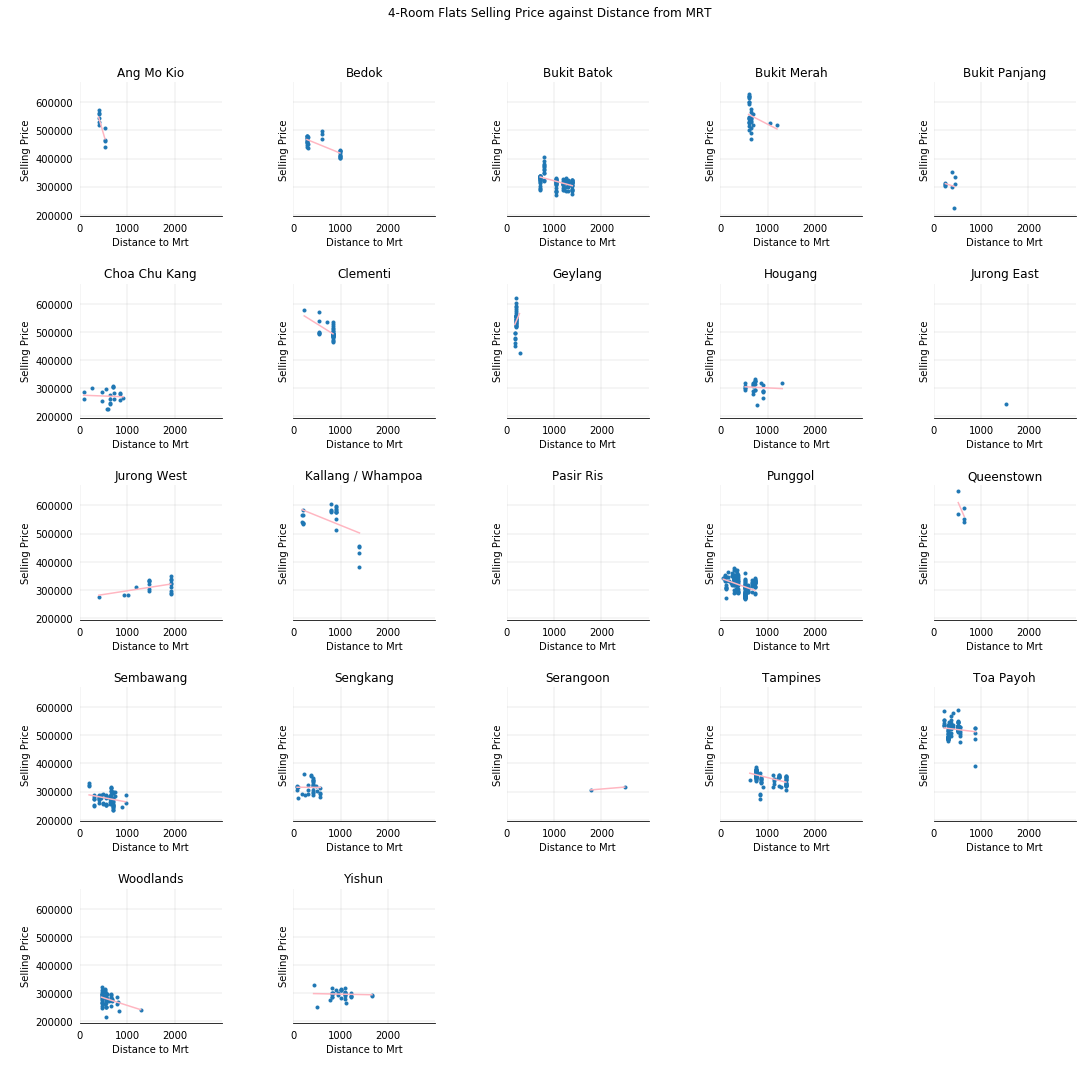

In [9]:
# Scatterplots Non repurchased and repurchased flat leasedate not so old
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from datetime import datetime

os.getcwd()
# TO get a boxplot to see the number of 4-Rooms flats available for Nov 2018 Sale of balance flats

unitDetails = np.genfromtxt("Merged_unitsDetails_DistToMrt.csv", delimiter=",",skip_header=1,
                dtype=[('town','U24'),('rmType','U7'),('blk','U6'),('unitNum','U10'),
                      ('level','i4'),('sqm','i8'),
                      ('sellingPrice','i8'),('color','U12') ,('repurchasedFlat','U30'),('leaseLessThan60Yrs','U10'),
                      ('street','U30'),('probableCompletionDate','U10'),('deliveryPossessionDate','U30'),
                      ('leaseCommencementDate','U15'),('availableEthnicQuotaMl','U20'),
                      ('availableEthnicQuotaCh','U25'),('availableEthnicQuotaIn','U20'),('lastUpdate','U60'),
                      ('NearestMrt','U30'),('DistToMrt','f8'),('blkX','i8'),('blkY','i8')],
                missing_values=['na','-',''],filling_values=0, comments='!')

labels = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']
# defining names
DistToMrt= unitDetails['DistToMrt']
town = unitDetails['town']
rmType= unitDetails['rmType']
sellingPrice=unitDetails['sellingPrice']
leaseStarting = unitDetails['leaseCommencementDate']
repurchased = unitDetails['repurchasedFlat']
#print(town)
#print(DistToMrt)
townToMrt= zip(town,DistToMrt)
townToMrt =set(townToMrt)

# Gathering data for each line on distance
#for i in labels:
#    line_i=[]
#    for name in townToMrt:
#        if name[0]== i:
#            line_i.append(name[1])  # not that townToMrt is not a array
#    print("line_{}= {} ".format(i,line_i))
#    print()
##############################################

# Gathering data for town, distance and price
distPrice=list(zip(town,rmType,DistToMrt,sellingPrice, leaseStarting, repurchased))


# make subplots from my above plots
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

leaseDateThresholdDate = '1-Nov-17'
leaseDateThresholdObj = datetime.strptime(leaseDateThresholdDate, '%d-%b-%y')

for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        #print(name)
        if name[0]== town and name[1]=='4-Room' :
            #print(name)
            leaseStartingDate = name[4]
            try:
                leaseStartingDateObj = datetime.strptime(leaseStartingDate, '%d-%b-%y') # convert to datetime here
                #print(leaseStartingDate, leaseStartingDateObj)
                if leaseStartingDateObj < leaseDateThresholdObj or name[5]=="": # ignore old flats
                    #print(name)
                    dist_town.append(name[2])  # not that townToMrt is not a array
                    price_town.append(name[3])
            except ValueError: # some date format is not in the standard form
                # we also want date with a dash 
                if name[5]=="":
                    #print(name)
                    dist_town.append(name[2])  # not that townToMrt is not a array
                    price_town.append(name[3])
                else:
                    print('ignore date', leaseStartingDate, name)
                    #continue # skip this, ignore those rows

    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    dist_town_sorted = []
    price_town_sorted = []
    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
        

  # plotting the subplots
    ax = axes_list.pop(0) #extract element
    ax.plot(dist_town_sorted, price_town_sorted ,'.',clip_on=False)
    #ax.plot([0,1,2] )
    ax.set_title(town)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    ax.grid(linewidth=0.25)
    #ax.set_xlim((1950, 2020))
    ax.set_xticks(range(0,2800, 1000))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linewidth=0.25)
    ax.set_xlim((0,3000))
    ax.set_xlabel("Distance to Mrt")
    ax.set_ylabel("Selling Price")
    fig.suptitle('4-Room Flats Selling Price against Distance from MRT')
    
    # Best fit line
    x = dist_town_sorted
    y = price_town_sorted 
    def best_fit_slope_and_intercept(x,y):
        m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) /
             ((np.mean(x)*np.mean(x)) - np.mean(x*x)))
        b = np.mean(y) - m*np.mean(x)

        return m, b

    if len(x) > 1 :
        m, b = best_fit_slope_and_intercept(x,y)
        regression_line = [(m*x_bar)+b for x_bar in x]
        #style.use('ggplot')
        ax.plot(x, regression_line, color='lightpink') # specific to each subplot



for ax in axes_list:
        ax.remove()
    #ax.spines['left'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)

plt.tight_layout()  
fig.subplots_adjust(top=0.91)
plt.show()    
print()
    
## Distance is not the only factor that affects the price of the flats. Lease period also affects. In this case, the older 
# the flat, the cheaper it is so more people would want to buy those units.
